In [17]:
##NOTE : https://www.hackerearth.com/practice/machine-learning/machine-learning-projects/python-project/tutorial/

In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.rcParams['figure.figsize'] = (10.0, 8.0)

### 1. Data Loading

In [107]:
#Loading Dataset
train = pd.read_csv('HousingPrices_Train.csv')
test = pd.read_csv('HousingPrices_Test.csv')

### 2. Data Exploration

In [8]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [16]:
#Checking rows and columns in training and testing dataset
print('Training data has {} rows and {} columns'.format(train.shape[0], train.shape[1]))
print('Test data has {} rows and {} columns'.format(test.shape[0], test.shape[1]))

Training data has 1460 rows and 81 columns
Test data has 1459 rows and 80 columns


In [22]:
#Check columns with missing values
train.columns[train.isnull().any()]

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

In [48]:
#Finding count of missing values in each column
missing_count = train.isnull().sum()
missing_count = missing_count[missing_count > 0]
missing_count.sort_values(inplace=True)

In [49]:
missing_count

Electrical         1
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
BsmtExposure      38
BsmtFinType2      38
GarageCond        81
GarageQual        81
GarageFinish      81
GarageType        81
GarageYrBlt       81
LotFrontage      259
FireplaceQu      690
Fence           1179
Alley           1369
MiscFeature     1406
PoolQC          1453
dtype: int64

We can infer that columns PoolQC, MiscFeature, Alley and Fence have a lot of missing values. Now let's visualize this using a barplot for better understanding.

In [60]:
#Creeating Dataframe from missing_count series for feeding nto seaborn barplot 

miss_frame = pd.DataFrame(missing_count)
miss_frame.columns = ['Count']
miss_frame.index.names = ['Column']
miss_frame['Column'] = miss_frame.index

miss_frame

,Count,Column
Column,,
Electrical,1,Electrical
MasVnrType,8,MasVnrType
MasVnrArea,8,MasVnrArea
BsmtQual,37,BsmtQual
BsmtCond,37,BsmtCond
BsmtFinType1,37,BsmtFinType1
BsmtExposure,38,BsmtExposure
BsmtFinType2,38,BsmtFinType2
GarageCond,81,GarageCond


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]), <a list of 19 Text xticklabel objects>)

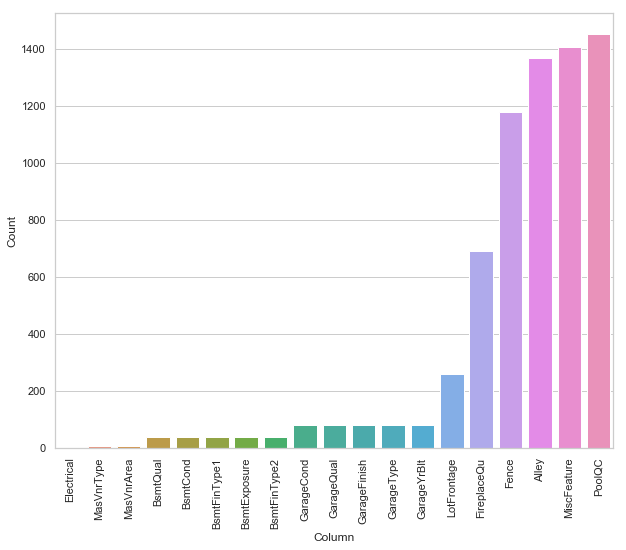

In [113]:
sns.barplot(x='Column', y='Count', data=miss_frame)

#Rotate xlabkes by 90 degress to aoid overlapping
plt.xticks(rotation = 90)

Now let's check the distribution of the target variable 'SalePrice'

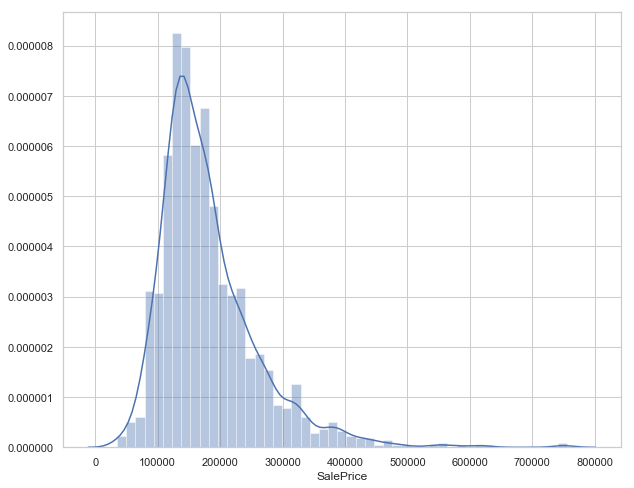

In [114]:
sns.distplot(train['SalePrice'])

In [108]:
#Removing Id column from dataset
train.drop(['Id'], axis=1, inplace=True)

categorical_features = train.select_dtypes(include=['object'])
numeric_features = train.select_dtypes(exclude=['object'])

In [109]:
print('There are {} categorical and {} numeric features in the training dataset'
      .format(categorical_features.shape[1], numeric_features.shape[1]))

There are 43 categorical and 37 numeric features in the training dataset


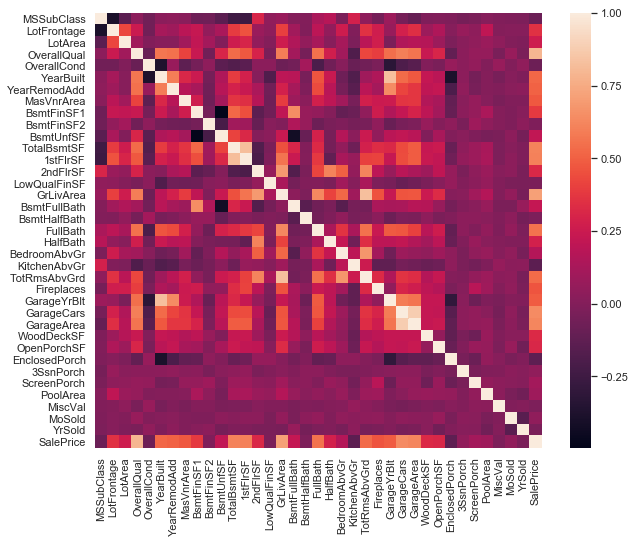

In [115]:
#correlation plot
corr = numeric_features.corr()
sns.heatmap(corr)

Observing the last row 'SalePrice' in above heatmap, we can conclude that few features have stronger correltion with dependent variable (SalePrice). These are marked by darker color in the heatmap.

In [120]:
#Viewing actual correlation in sorted manner
corr['SalePrice'].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64

In [122]:
train.head(2)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500


In [141]:
#Grouping OverallQual values with the mean of SalePrice
train.groupby('OverallQual', axis=0).mean()['SalePrice']

OverallQual
1      50150.000000
2      51770.333333
3      87473.750000
4     108420.655172
5     133523.347607
6     161603.034759
7     207716.423197
8     274735.535714
9     367513.023256
10    438588.388889
Name: SalePrice, dtype: float64